In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble               import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier,HistGradientBoostingClassifier
from sklearn.multiclass             import OneVsRestClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.linear_model           import LogisticRegression,Perceptron,PassiveAggressiveClassifier,SGDClassifier
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.svm                    import SVC,NuSVC
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB,BernoulliNB

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [2]:
def     data_frame(pair_name):
    folder_path=f"C:\\Users\\manch\\OneDrive\\Documents\\dev\\Trading\\Synthetics\\Step_index\\data_files\\labeled"
    file        =   folder_path+f"\\{pair_name}"
    df          =   pd.read_csv(file,sep=' ')
    return df

In [3]:
dfMain=data_frame(pair_name="dfUltimate_Moving Average Trends_STEP_2024_M1_9_3_14_20_99999.csv")
dfMain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time Stamps          99999 non-null  object 
 1   Instance             99999 non-null  int64  
 2   Closes               99999 non-null  float64
 3   Ma                   99999 non-null  float64
 4   Ma Close Diff        99999 non-null  float64
 5   Linear Reg Slope     99999 non-null  float64
 6   Trend Change         99999 non-null  float64
 7   WPR                  99999 non-null  float64
 8   CCI                  99999 non-null  float64
 9   MBand                99999 non-null  float64
 10  UBand                99999 non-null  float64
 11  LBand                99999 non-null  float64
 12  diffsFromTop         99999 non-null  float64
 13  diffsFromBot         99999 non-null  float64
 14  RSI                  99999 non-null  float64
 15  diffsFromMid         99999 non-null 

In [4]:
dfMain.describe()

,Instance,Closes,Ma,Ma Close Diff,Linear Reg Slope,Trend Change,WPR,CCI,MBand,UBand,LBand,diffsFromTop,diffsFromBot,RSI,diffsFromMid,Slope Ma,Slope Ma Close diff,Slope Trend,Slope Linear Reg
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9.999900e+04
mean,50000.000000,8105.323872,8105.329872,-0.006000,-0.001907,-0.020075,-50.273771,-0.667344,8105.342317,8107.947557,8102.737077,-2.623684,2.586796,49.858415,-0.018444,-0.001951,-0.000006,-0.000008,-5.127051e-07
std,28867.369122,101.718496,101.717209,1.088950,0.189533,2.733390,31.555316,105.562625,101.714457,101.698968,101.741145,2.213294,2.180976,11.864152,1.920431,0.325128,0.837632,1.789983,3.323824e-02
min,1.000000,7950.800000,7951.249950,-4.493920,-0.780080,-20.200000,-100.000000,-368.115940,7952.030000,7953.352270,7949.760150,-16.612770,-2.171340,9.728400,-7.880000,-1.401550,-3.636190,-19.000000,-1.400000e-01
25%,25000.500000,8012.500000,8012.497105,-0.744320,-0.130975,-1.400000,-79.310340,-86.911165,8012.470000,8015.029210,8009.973820,-3.750820,1.013600,41.517460,-1.320000,-0.221250,-0.564390,-0.800000,-2.241000e-02
50%,50000.000000,8070.800000,8070.843110,-0.005000,-0.000680,0.000000,-50.000000,-1.614760,8070.940000,8073.450500,8068.319160,-2.137570,2.105900,49.868000,-0.020000,-0.001720,0.000710,0.000000,0.000000e+00
75%,74999.500000,8206.700000,8206.689495,0.729975,0.126690,1.400000,-21.212120,85.714290,8206.860000,8209.439795,8204.091005,-1.021255,3.700870,58.207875,1.290000,0.218250,0.567945,0.600000,2.241000e-02
max,99999.000000,8310.600000,8309.576510,4.417090,0.715560,18.200000,0.000000,363.841810,8308.560000,8311.105810,8306.888590,2.127930,15.223980,90.564440,7.410000,1.318640,3.832760,20.200000,1.360900e-01


In [5]:
dfMain.keys()

Index(['Time Stamps', 'Instance', 'Closes', 'Ma', 'Ma Close Diff',
       'Linear Reg Slope', 'Trend Change', 'WPR', 'CCI', 'MBand', 'UBand',
       'LBand', 'diffsFromTop', 'diffsFromBot', 'RSI', 'diffsFromMid',
       'Slope Ma', 'Slope Ma Close diff', 'Slope Trend', 'Slope Linear Reg',
       'Peak'],
      dtype='object')

In [6]:
d={'Closes':dfMain['Closes'],'Ma':dfMain['Ma'],'MBand':dfMain['MBand'],'Peak':dfMain['Peak']}
df=pd.DataFrame(data=d)
y=dfMain["Peak"]
dfMain.pop('Trend Change')
dfMain.pop('Slope Trend')
dfMain.pop('Time Stamps')
dfMain.pop('Instance')
dfMain.pop("Peak")
X=dfMain
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Closes  99999 non-null  float64
 1   Ma      99999 non-null  float64
 2   MBand   99999 non-null  float64
 3   Peak    99999 non-null  object 
dtypes: float64(3), object(1)
memory usage: 3.1+ MB


In [7]:
scaler = StandardScaler()
X =scaler.fit_transform(X.astype("float64"))

In [8]:
X_train, X_test, y_train, y_test = X[:80000], X[80000:], y[:80000], y[80000:]

In [81]:
voting_clf_1 = VotingClassifier(
 estimators=[
 ('logreg', LogisticRegression(random_state=42)),
 ('rfoest_clf', RandomForestClassifier(random_state=42)),
 ('sgd_clf',SGDClassifier(loss='hinge',penalty='l1')),
 ('ada_clf',AdaBoostClassifier())
 ]
)
voting_clf_2 = VotingClassifier(
 estimators=[
 ('logreg',   LogisticRegression(random_state=42)),
 ('bag_clf',  BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,oob_score=True, n_jobs=-1, random_state=42)),
 ('gbc_clf',  GradientBoostingClassifier()),
 ('sgd_clf',  SGDClassifier(loss='hinge',penalty='l1')),
 ('ada_clf',  AdaBoostClassifier(random_state=42))
 ]
)
metrics=['p', 'precomputed', 'cityblock', 'chebyshev', 'pyfunc', 'infinity', 'euclidean', 'mahalanobis', 'l1', 'correlation', 'russellrao', 'sokalsneath', 'minkowski', 'braycurtis', 'rogerstanimoto', 'sokalmichener', 'l2', 'cosine', 'hamming', 'dice', 'seuclidean', 'haversine', 'manhattan', 'nan_euclidean', 'sqeuclidean', 'jaccard', 'canberra', 'yule']
knn_clf =   KNeighborsClassifier(n_neighbors=2,algorithm='ball_tree',weights='uniform',leaf_size=100,metric=metrics[8],n_jobs=-1)
bag_clf =   BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, n_jobs=-1, random_state=42)
sgd_clf =   SGDClassifier(loss='hinge',penalty='l1')
rfstclf =   RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,n_jobs=-1, random_state=42)
EXT_clf =   ExtraTreesClassifier()
LogRclf =   LogisticRegression()
DecTclf =   DecisionTreeClassifier()
GDB_clf =   GradientBoostingClassifier()
QDA_clf =   QuadraticDiscriminantAnalysis()
ADA_clf =   AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=30,learning_rate=0.5, random_state=42)
GNB_clf =   GaussianNB()
BNB_clf =   BernoulliNB()
LDA_clf =   LinearDiscriminantAnalysis()
PRP_clf =   Perceptron()
PAG_clf =   PassiveAggressiveClassifier()

classifiers={'voting_1':voting_clf_1,
             'voting_2':voting_clf_2,
             'KNN Classifier':knn_clf,
             'Bagging Classifier':bag_clf,
             'StochasticGD Classifier':sgd_clf,
             'RandomFST Classifier':rfstclf,
            'ExtraTreesClassifier':EXT_clf,
            'LogisticRegression Classifier':LogRclf,
            'DecisionTree   Classifier':DecTclf,
            'GradientBoosting Classifier':GDB_clf,
            'QuadraticDA Classifier':QDA_clf,
            'AdaBoost   Classifier':ADA_clf,
            'GaussianNB Classifier':GNB_clf,
            'BernoulliNB Classifier':BNB_clf,
            'LinearDA Classifier':LDA_clf,
            'Perceptron Classifier':PRP_clf,
            'PassiveAG Classifier':PAG_clf,
             }
classifiers['voting_1'].fit(X_train, y_train)

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('logreg', LogisticRegression(random_state=42)),
                             ('rfoest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('sgd_clf', SGDClassifier(penalty='l1')),
                             ('ada_clf', AdaBoostClassifier())])

In [85]:
y_pred_voting_1=classifiers['voting_1'].predict(X_test)
print("voting classifier report\n",classification_report(y_pred=y_pred_voting_1,y_true=y_test))

voting classifier report
               precision    recall  f1-score   support

       crest       0.31      0.08      0.12      2469
     falling       0.60      0.85      0.70      7509
      rising       0.61      0.70      0.65      7552
      trough       0.35      0.00      0.01      2469

    accuracy                           0.59     19999
   macro avg       0.46      0.41      0.37     19999
weighted avg       0.53      0.59      0.52     19999



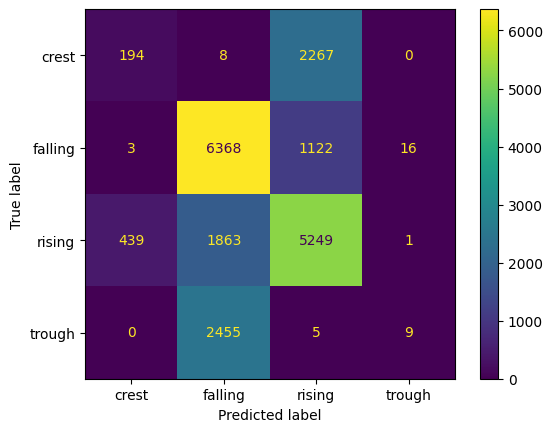

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_voting_1)
plt.show()

In [87]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

def train_and_evaluate(classifiers, action='train', X_train=None, y_train=None, X_test=None, y_test=None):
    results = []
    
    for name, clf in classifiers.items():
        if action == 'train':
            print(f"Training {name}...")
            clf.fit(X_train, y_train)
        elif action == 'evaluate':
            print(f"Evaluating {name}...")
            y_pred = clf.predict(X_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            accuracy = accuracy_score(y_test, y_pred)
            # Collecting metrics in a dictionary
            metrics = {'Model': name}
            for label, metrics_dict in report.items():
                if label not in ['accuracy', 'macro avg', 'weighted avg']:
                    metrics[f'Label {label} Precision'] = metrics_dict['precision']
                    metrics[f'Label {label} Recall'] = metrics_dict['recall']
            metrics['Accuracy'] = accuracy
            results.append(metrics)
        else:
            raise ValueError("Action must be either 'train' or 'evaluate'")
    
    if action == 'evaluate':
        df = pd.DataFrame(results)
        return df


In [88]:
# Usage example
# Assuming X_train, y_train, X_test, y_test are defined
# To train the classifiers
train_and_evaluate(classifiers, action='train', X_train=X_train, y_train=y_train)

Training voting_1...


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training voting_2...


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training KNN Classifier...
Training Bagging Classifier...
Training StochasticGD Classifier...
Training RandomFST Classifier...
Training ExtraTreesClassifier...
Training LogisticRegression Classifier...


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training DecisionTree   Classifier...
Training GradientBoosting Classifier...
Training QuadraticDA Classifier...


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training AdaBoost   Classifier...
Training GaussianNB Classifier...
Training BernoulliNB Classifier...
Training LinearDA Classifier...
Training Perceptron Classifier...
Training PassiveAG Classifier...


In [89]:
# To evaluate the classifiers and get the DataFrame
evaluation_df = train_and_evaluate(classifiers, action='evaluate', X_test=X_test, y_test=y_test)
print(evaluation_df)

Evaluating voting_1...
Evaluating voting_2...
Evaluating KNN Classifier...
Evaluating Bagging Classifier...
Evaluating StochasticGD Classifier...


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

Evaluating RandomFST Classifier...


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

Evaluating ExtraTreesClassifier...
Evaluating LogisticRegression Classifier...
Evaluating DecisionTree   Classifier...
Evaluating GradientBoosting Classifier...
Evaluating QuadraticDA Classifier...
Evaluating AdaBoost   Classifier...


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

Evaluating GaussianNB Classifier...
Evaluating BernoulliNB Classifier...
Evaluating LinearDA Classifier...
Evaluating Perceptron Classifier...
Evaluating PassiveAG Classifier...
                            Model  Label crest Precision  Label crest Recall  \
0                        voting_1               0.305031            0.078574   
1                        voting_2               0.176471            0.001215   
2                  KNN Classifier               0.324311            0.553260   
3              Bagging Classifier               0.666667            0.000810   
4         StochasticGD Classifier               0.000000            0.000000   
5            RandomFST Classifier               0.000000            0.000000   
6            ExtraTreesClassifier               0.427430            0.130012   
7   LogisticRegression Classifier               0.272727            0.038882   
8       DecisionTree   Classifier               0.368360            0.387606   
9     GradientBoosting

In [90]:
evaluation_df.head()

,Model,Label crest Precision,Label crest Recall,Label falling Precision,Label falling Recall,Label rising Precision,Label rising Recall,Label trough Precision,Label trough Recall,Accuracy
0,voting_1,0.305031,0.078574,0.595130,0.852710,0.608441,0.689089,0.333333,0.006885,0.590930
1,voting_2,0.176471,0.001215,0.602399,0.815954,0.610995,0.774100,0.489712,0.048198,0.604780
2,KNN Classifier,0.324311,0.553260,0.552538,0.764017,0.559939,0.340175,0.335784,0.110976,0.497325
3,Bagging Classifier,0.666667,0.000810,0.603171,0.800373,0.605008,0.802966,0.333333,0.001215,0.603980
4,StochasticGD Classifier,0.000000,0.000000,0.601239,0.826874,0.611456,0.783104,0.000000,0.000000,0.606180


In [116]:
import plotly.express as px
px.bar(data_frame=evaluation_df,x='Model',y='Accuracy',color='Accuracy',title='Models Accuracy')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Model=%{x}<br>Accuracy=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([0.59092955, 0.60478024, 0.49732487, 0.6039802 , 0.60618031, 0.59862993,
                                         0.58822941, 0.59317966, 0.50922546, 0.60068003, 0.43362168, 0.58347917,
                                         0.42902145, 0.41242062, 0.59092955, 0.53737687, 0.2540627 ]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['voting_1', 'voting_2', 'KNN Classifier', 'Bagging Classifier',
                          'StochasticGD Classifier', 'RandomFST Classifier',
                          'ExtraTreesClassifier', 'LogisticRegression Classifier',
                          'DecisionTree   Classifier', 'GradientBoosting Classifier',
                          'QuadraticDA Classifier', 'AdaBoost   Classifier',
                          'GaussianNB Classifier', 'BernoulliNB Classifier',
                          'LinearDA Classifier', 'Perceptron Classifier', 'PassiveAG Classifier'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0.59092955, 0.60478024, 0.49732487, 0.6039802 , 0.60618031, 0.59862993,
                          0.58822941, 0.59317966, 0.50922546, 0.60068003, 0.43362168, 0.58347917,
                          0.42902145, 0.41242062, 0.59092955, 0.53737687, 0.2540627 ]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Accuracy'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Models Accuracy'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Accuracy'}}}
})

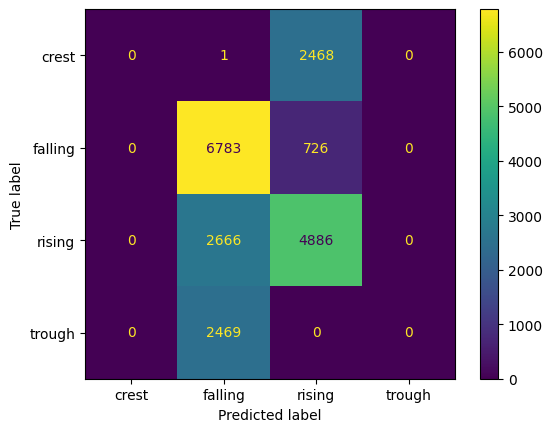

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



AdaBoost   Classifier report
               precision    recall  f1-score   support

       crest       0.00      0.00      0.00      2469
     falling       0.57      0.90      0.70      7509
      rising       0.60      0.65      0.63      7552
      trough       0.00      0.00      0.00      2469

    accuracy                           0.58     19999
   macro avg       0.29      0.39      0.33     19999
weighted avg       0.44      0.58      0.50     19999



c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [148]:
model_names=evaluation_df['Model']
model_name=model_names[11]
y_pred=classifiers[model_name].predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(f"{model_name} report\n",classification_report(y_pred=y_pred,y_true=y_test))

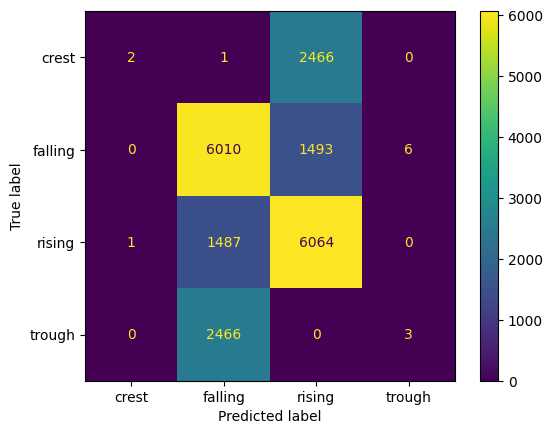

Bagging Classifier report
               precision    recall  f1-score   support

       crest       0.67      0.00      0.00      2469
     falling       0.60      0.80      0.69      7509
      rising       0.61      0.80      0.69      7552
      trough       0.33      0.00      0.00      2469

    accuracy                           0.60     19999
   macro avg       0.55      0.40      0.35     19999
weighted avg       0.58      0.60      0.52     19999



In [133]:
model_names=evaluation_df['Model']
model_name=model_names[3]
y_pred=classifiers[model_name].predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(f"{model_name} report\n",classification_report(y_pred=y_pred,y_true=y_test))

In [137]:
model_names

0                          voting_1
1                          voting_2
2                    KNN Classifier
3                Bagging Classifier
4           StochasticGD Classifier
5              RandomFST Classifier
6              ExtraTreesClassifier
7     LogisticRegression Classifier
8         DecisionTree   Classifier
9       GradientBoosting Classifier
10           QuadraticDA Classifier
11            AdaBoost   Classifier
12            GaussianNB Classifier
13           BernoulliNB Classifier
14              LinearDA Classifier
15            Perceptron Classifier
16             PassiveAG Classifier
Name: Model, dtype: object

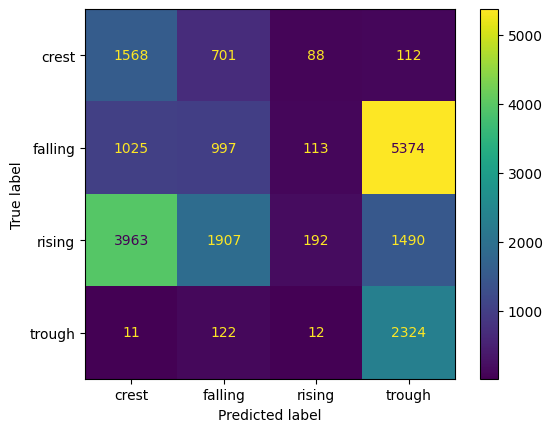

PassiveAG Classifier report
               precision    recall  f1-score   support

       crest       0.24      0.64      0.35      2469
     falling       0.27      0.13      0.18      7509
      rising       0.47      0.03      0.05      7552
      trough       0.25      0.94      0.39      2469

    accuracy                           0.25     19999
   macro avg       0.31      0.43      0.24     19999
weighted avg       0.34      0.25      0.18     19999



In [144]:
model_name=model_names[16]
y_pred=classifiers[model_name].predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(f"{model_name} report\n",classification_report(y_pred=y_pred,y_true=y_test))

In [145]:
from joblib import dump

dump(classifiers[model_name], 'model_noisy_trough_crest_PassiveAG Classifier.joblib')

['model_noisy_trough_crest_PassiveAG Classifier.joblib']

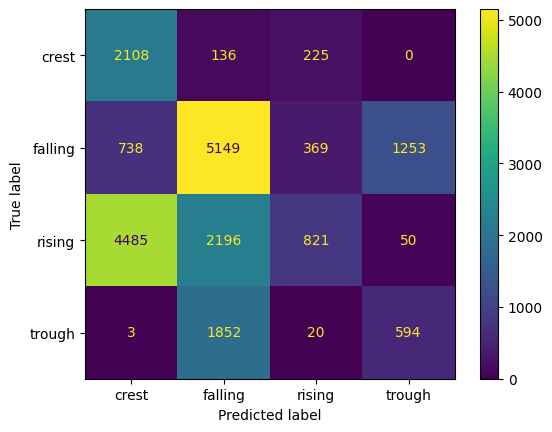

QuadraticDA Classifier report
               precision    recall  f1-score   support

       crest       0.29      0.85      0.43      2469
     falling       0.55      0.69      0.61      7509
      rising       0.57      0.11      0.18      7552
      trough       0.31      0.24      0.27      2469

    accuracy                           0.43     19999
   macro avg       0.43      0.47      0.37     19999
weighted avg       0.50      0.43      0.39     19999



In [146]:
model_name=model_names[10]
y_pred=classifiers[model_name].predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(f"{model_name} report\n",classification_report(y_pred=y_pred,y_true=y_test))

In [147]:
from joblib import dump

dump(classifiers[model_name], 'model_noisy_crest_QuadraticDA_Classifier.joblib')

['model_noisy_crest_QuadraticDA_Classifier.joblib']

In [120]:
px.bar(data_frame=evaluation_df,x='Model',y='Label crest Precision',color='Label crest Precision',title='Crest Precision')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Model=%{x}<br>Label crest Precision=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([0.30503145, 0.17647059, 0.32431149, 0.66666667, 0.        , 0.        ,
                                         0.42743009, 0.27272727, 0.36836028, 0.45333333, 0.28742842, 0.        ,
                                         0.32246377, 0.31080247, 0.28225806, 0.10909091, 0.23876961]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['voting_1', 'voting_2', 'KNN Classifier', 'Bagging Classifier',
                          'StochasticGD Classifier', 'RandomFST Classifier',
                          'ExtraTreesClassifier', 'LogisticRegression Classifier',
                          'DecisionTree   Classifier', 'GradientBoosting Classifier',
                          'QuadraticDA Classifier', 'AdaBoost   Classifier',
                          'GaussianNB Classifier', 'BernoulliNB Classifier',
                          'LinearDA Classifier', 'Perceptron Classifier', 'PassiveAG Classifier'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0.30503145, 0.17647059, 0.32431149, 0.66666667, 0.        , 0.        ,
                          0.42743009, 0.27272727, 0.36836028, 0.45333333, 0.28742842, 0.        ,
                          0.32246377, 0.31080247, 0.28225806, 0.10909091, 0.23876961]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Label crest Precision'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Crest Precision'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Label crest Precision'}}}
})

In [113]:
px.bar(data_frame=evaluation_df,x='Model',y='Label crest Recall',color='Label crest Recall',title='Crest Recall')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Model=%{x}<br>Label crest Recall=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([7.85743216e-02, 1.21506683e-03, 5.53260429e-01, 8.10044552e-04,
                                         0.00000000e+00, 0.00000000e+00, 1.30012151e-01, 3.88821385e-02,
                                         3.87606318e-01, 6.88537870e-02, 8.53786958e-01, 0.00000000e+00,
                                         4.32563791e-01, 4.07857432e-01, 4.25273390e-02, 4.86026731e-03,
                                         6.35074929e-01]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['voting_1', 'voting_2', 'KNN Classifier', 'Bagging Classifier',
                          'StochasticGD Classifier', 'RandomFST Classifier',
                          'ExtraTreesClassifier', 'LogisticRegression Classifier',
                          'DecisionTree   Classifier', 'GradientBoosting Classifier',
                          'QuadraticDA Classifier', 'AdaBoost   Classifier',
                          'GaussianNB Classifier', 'BernoulliNB Classifier',
                          'LinearDA Classifier', 'Perceptron Classifier', 'PassiveAG Classifier'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([7.85743216e-02, 1.21506683e-03, 5.53260429e-01, 8.10044552e-04,
                          0.00000000e+00, 0.00000000e+00, 1.30012151e-01, 3.88821385e-02,
                          3.87606318e-01, 6.88537870e-02, 8.53786958e-01, 0.00000000e+00,
                          4.32563791e-01, 4.07857432e-01, 4.25273390e-02, 4.86026731e-03,
                          6.35074929e-01]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Label crest Recall'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Crest Recall'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Label crest Recall'}}}
})

In [112]:
px.bar(data_frame=evaluation_df,x='Model',y='Label trough Precision',title='Trough Precision')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Model=%{x}<br>Label trough Precision=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['voting_1', 'voting_2', 'KNN Classifier', 'Bagging Classifier',
                          'StochasticGD Classifier', 'RandomFST Classifier',
                          'ExtraTreesClassifier', 'LogisticRegression Classifier',
                          'DecisionTree   Classifier', 'GradientBoosting Classifier',
                          'QuadraticDA Classifier', 'AdaBoost   Classifier',
                          'GaussianNB Classifier', 'BernoulliNB Classifier',
                          'LinearDA Classifier', 'Perceptron Classifier', 'PassiveAG Classifier'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0.33333333, 0.48971193, 0.33578431, 0.33333333, 0.        , 0.        ,
                          0.40304709, 0.29098361, 0.3619403 , 0.48138298, 0.31312599, 0.        ,
                          0.32186459, 0.31345178, 0.30272109, 0.2893424 , 0.24989247]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Trough Precision'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Label trough Precision'}}}
})

In [111]:
px.bar(data_frame=evaluation_df,x='Model',y='Label trough Recall',title='Trough Recall')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Model=%{x}<br>Label trough Recall=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['voting_1', 'voting_2', 'KNN Classifier', 'Bagging Classifier',
                          'StochasticGD Classifier', 'RandomFST Classifier',
                          'ExtraTreesClassifier', 'LogisticRegression Classifier',
                          'DecisionTree   Classifier', 'GradientBoosting Classifier',
                          'QuadraticDA Classifier', 'AdaBoost   Classifier',
                          'GaussianNB Classifier', 'BernoulliNB Classifier',
                          'LinearDA Classifier', 'Perceptron Classifier', 'PassiveAG Classifier'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0.00688538, 0.04819765, 0.1109761 , 0.00121507, 0.        , 0.        ,
                          0.11786148, 0.02875658, 0.39287161, 0.07330903, 0.24058323, 0.        ,
                          0.46982584, 0.40016201, 0.03604698, 0.25840421, 0.94127177]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Trough Recall'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Label trough Recall'}}}
})

In [110]:
px.bar(data_frame=evaluation_df,x='Model',y='Label falling Precision',title='Falling Precision')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Model=%{x}<br>Label falling Precision=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['voting_1', 'voting_2', 'KNN Classifier', 'Bagging Classifier',
                          'StochasticGD Classifier', 'RandomFST Classifier',
                          'ExtraTreesClassifier', 'LogisticRegression Classifier',
                          'DecisionTree   Classifier', 'GradientBoosting Classifier',
                          'QuadraticDA Classifier', 'AdaBoost   Classifier',
                          'GaussianNB Classifier', 'BernoulliNB Classifier',
                          'LinearDA Classifier', 'Perceptron Classifier', 'PassiveAG Classifier'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0.59512966, 0.60239898, 0.5525378 , 0.60317142, 0.60123947, 0.59638376,
                          0.59924365, 0.60238995, 0.55923778, 0.60591803, 0.55169827, 0.56909137,
                          0.47837838, 0.45784543, 0.60107316, 0.57144761, 0.26750738]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Falling Precision'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Label falling Precision'}}}
})

In [109]:
px.bar(data_frame=evaluation_df,x='Model',y='Label falling Recall',title='Falling Recall')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Model=%{x}<br>Label falling Recall=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['voting_1', 'voting_2', 'KNN Classifier', 'Bagging Classifier',
                          'StochasticGD Classifier', 'RandomFST Classifier',
                          'ExtraTreesClassifier', 'LogisticRegression Classifier',
                          'DecisionTree   Classifier', 'GradientBoosting Classifier',
                          'QuadraticDA Classifier', 'AdaBoost   Classifier',
                          'GaussianNB Classifier', 'BernoulliNB Classifier',
                          'LinearDA Classifier', 'Perceptron Classifier', 'PassiveAG Classifier'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0.85271008, 0.81595419, 0.76401651, 0.80037289, 0.82687442, 0.8038354 ,
                          0.73858037, 0.78545745, 0.53935278, 0.77174058, 0.68571048, 0.90331602,
                          0.40071914, 0.41656679, 0.77573578, 0.5709149 , 0.132774  ]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Falling Recall'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Label falling Recall'}}}
})

In [108]:
px.bar(data_frame=evaluation_df,x='Model',y='Label rising Precision',title='Rising Precision')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Model=%{x}<br>Label rising Precision=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['voting_1', 'voting_2', 'KNN Classifier', 'Bagging Classifier',
                          'StochasticGD Classifier', 'RandomFST Classifier',
                          'ExtraTreesClassifier', 'LogisticRegression Classifier',
                          'DecisionTree   Classifier', 'GradientBoosting Classifier',
                          'QuadraticDA Classifier', 'AdaBoost   Classifier',
                          'GaussianNB Classifier', 'BernoulliNB Classifier',
                          'LinearDA Classifier', 'Perceptron Classifier', 'PassiveAG Classifier'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0.60844148, 0.61099498, 0.55993897, 0.60500848, 0.61145575, 0.60093136,
                          0.60468126, 0.60320433, 0.56250836, 0.60584469, 0.57212544, 0.60470297,
                          0.49212425, 0.46125461, 0.60143124, 0.57061481, 0.47407407]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Rising Precision'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Label rising Precision'}}}
})

In [107]:
px.bar(data_frame=evaluation_df,x='Model',y='Label rising Recall',title='Rising Recall')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Model=%{x}<br>Label rising Recall=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['voting_1', 'voting_2', 'KNN Classifier', 'Bagging Classifier',
                          'StochasticGD Classifier', 'RandomFST Classifier',
                          'ExtraTreesClassifier', 'LogisticRegression Classifier',
                          'DecisionTree   Classifier', 'GradientBoosting Classifier',
                          'QuadraticDA Classifier', 'AdaBoost   Classifier',
                          'GaussianNB Classifier', 'BernoulliNB Classifier',
                          'LinearDA Classifier', 'Perceptron Classifier', 'PassiveAG Classifier'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0.68908898, 0.77409958, 0.34017479, 0.8029661 , 0.78310381, 0.78601695,
                          0.74231992, 0.76774364, 0.55707097, 0.7768803 , 0.10871292, 0.64698093,
                          0.44266419, 0.41379767, 0.76787606, 0.76933263, 0.02542373]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Rising Recall'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Model'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Label rising Recall'}}}
})

In [60]:
for score, name in zip(rfstclf.feature_importances_,dfMain.columns):
    print(round(score, 2), name)


0.0 Closes
0.0 Ma
0.34 Ma Close Diff
0.01 Linear Reg Slope
0.07 WPR
0.12 CCI
0.0 MBand
0.0 UBand
0.0 LBand
0.03 diffsFromTop
0.03 diffsFromBot
0.01 RSI
0.02 diffsFromMid
0.04 Slope Ma
0.32 Slope Ma Close diff
0.01 Slope Linear Reg


In [ ]:
import numpy as np
V=np.cov(X_train.T)
VI=np.linalg.inv(V)
metrics=['p', 'precomputed', 'cityblock', 'chebyshev', 'pyfunc', 'infinity', 'euclidean', 'mahalanobis', 'l1', 'correlation', 'russellrao', 'sokalsneath', 'minkowski', 'braycurtis', 'rogerstanimoto', 'sokalmichener', 'l2', 'cosine', 'hamming', 'dice', 'seuclidean', 'haversine', 'manhattan', 'nan_euclidean', 'sqeuclidean', 'jaccard', 'canberra', 'yule']
kclf=KNeighborsClassifier(n_neighbors=2,algorithm='ball_tree',weights='uniform',leaf_size=100,metric=metrics[8],n_jobs=-1)
#clf=KNeighborsClassifier(n_neighbors=37,algorithm='auto',weights='distance',leaf_size=69,metric='mahalanobis',metric_params={'V':VI},n_jobs=-1) best
#clf=KNeighborsClassifier(n_neighbors=37,algorithm='auto',weights='distance',leaf_size=69,p=1,metric='hamming') good for falling recall
"""
kclf=GridSearchCV(KNeighborsClassifier(),{
                                            'n_neighbors':[1,2,11,20,37,42],
                                            'weights':['uniform', 'distance'],
                                            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                                            'leaf_size': [1,2,11,20,37,42],
                                            'p':[1,2,11,20,37,42]
                                         },cv=3,return_train_score=False)
"""
kclf.fit(X_train,y_train)
y_pred_k=kclf.predict(X_test)
print("knnnn",classification_report(y_test,y_pred_k))

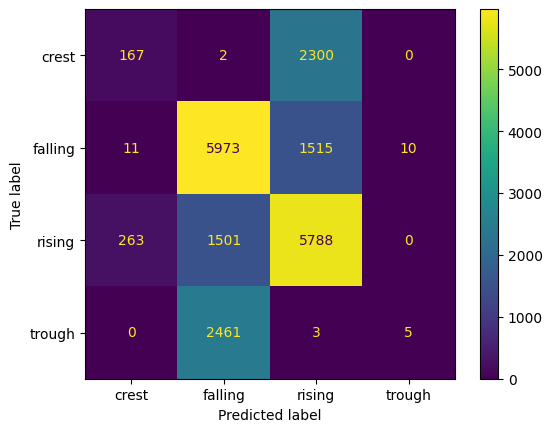

In [125]:
clf = NuSVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [126]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       crest       0.07      0.38      0.11       441
     falling       0.80      0.60      0.68      9937
      rising       0.77      0.60      0.67      9606
      trough       0.00      0.33      0.00        15

    accuracy                           0.60     19999
   macro avg       0.41      0.48      0.37     19999
weighted avg       0.76      0.60      0.67     19999



In [9]:
ovr_clf = OneVsRestClassifier(SVC(kernel='poly',degree=3,random_state=42))
ovr_clf.fit(X_train,y_train)
y_pred=ovr_clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_pred,y_test))